# **Load** **Dataset**

In [2]:
# Load dataset
df = pd.read_csv("spotify_data.csv")
print("Original shape:", df.shape)
df.head()

Original shape: (41389, 22)


,Unnamed: 0,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,0,2020-02-24T03:25:10Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",66094,IN,42.106.46.255,unknown,Feel so Lucky,T.L.I.D,...,NaN,NaN,NaN,playbtn,trackdone,False,NaN,0.0,1.582515e+12,False
1,1,2020-02-24T03:27:51Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",160353,IN,42.106.46.255,unknown,Me & You,T.L.I.D,...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,0.0,1.582515e+12,False
2,2,2020-02-24T03:29:52Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",119683,IN,42.106.46.255,unknown,Lost in Space,T.L.I.D,...,NaN,NaN,NaN,trackdone,endplay,False,NaN,0.0,1.582515e+12,False
3,3,2020-02-24T03:30:07Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",13409,IN,42.106.46.255,unknown,Just The Way You Are,Bruno Mars,...,NaN,NaN,NaN,clickrow,endplay,False,NaN,0.0,1.582515e+12,False
4,4,2020-02-24T03:30:59Z,31qv3lgbx4jn45gkwql77frnwvpu,"Android OS 8.0.0 API 26 (lenovo, Lenovo K8 Note)",43399,IN,42.106.46.255,unknown,HIGHEST IN THE ROOM,Travis Scott,...,NaN,NaN,NaN,clickrow,trackdone,False,NaN,0.0,1.582515e+12,False


In [1]:
import pandas as pd
import numpy as np

# Upload the file
from google.colab import files
uploaded = files.upload()

Saving spotify_data.csv to spotify_data.csv


# **Drop** **Irrelevant** **Columns**

In [4]:
columns_to_drop = [
    'Unnamed: 0', 'username', 'ip_addr_decrypted', 'user_agent_decrypted',
    'episode_name', 'episode_show_name', 'spotify_episode_uri',
    'offline_timestamp'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')


# **Drop** **rows**

In [5]:
# Drop rows where 'skipped' is missing
df = df.dropna(subset=['skipped'])

# **Fill** **Missing** **Values** **In** **Key** **Categorical** **Columns**

In [10]:
# Fill missing values in key categorical columns
df.fillna({'master_metadata_track_name':'Unknown Track'}, inplace=True)
df.fillna({'master_metadata_album_artist_name':'Unknown Artist'}, inplace=True)
df.fillna({'master_metadata_album_album_name':'Unknown Album'}, inplace=True)

# **Convert** **Data** **Types**

In [14]:
# Convert timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')

# Convert 'skipped' to integer
df['skipped'] = df['skipped'].astype(int)

# Optional: remove rows with 0 playback time
df = df[df['ms_played'] > 0]

# Reset index
df.reset_index(drop=True, inplace=True)


In [15]:
df.to_csv("spotify_data_cleaned.csv", index=False)
files.download("spotify_data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Top** **10** **Artists**

<ipython-input-16-f1c81131c4b0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


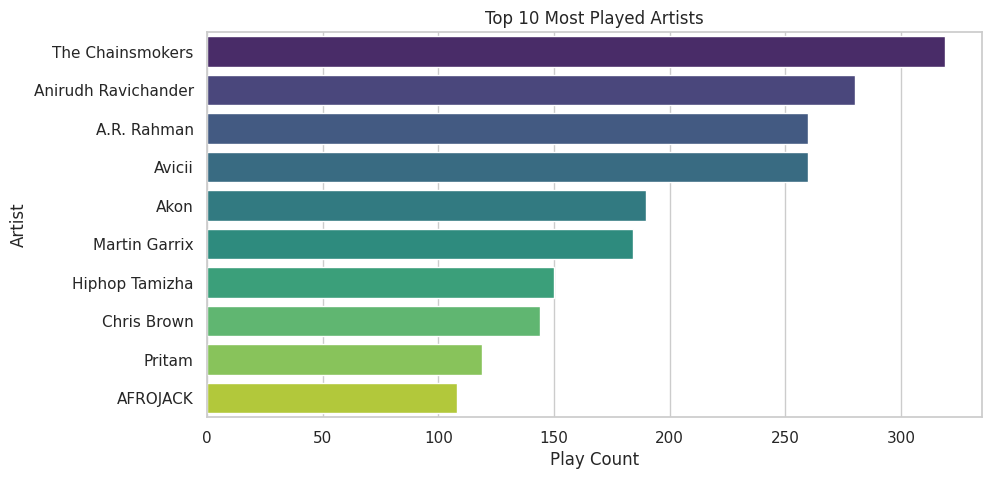

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Top Artists
top_artists = df['master_metadata_album_artist_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Played Artists')
plt.xlabel('Play Count')
plt.ylabel('Artist')
plt.show()



# **Top** **10** **Tracks**

<ipython-input-17-fd536445d698>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='magma')


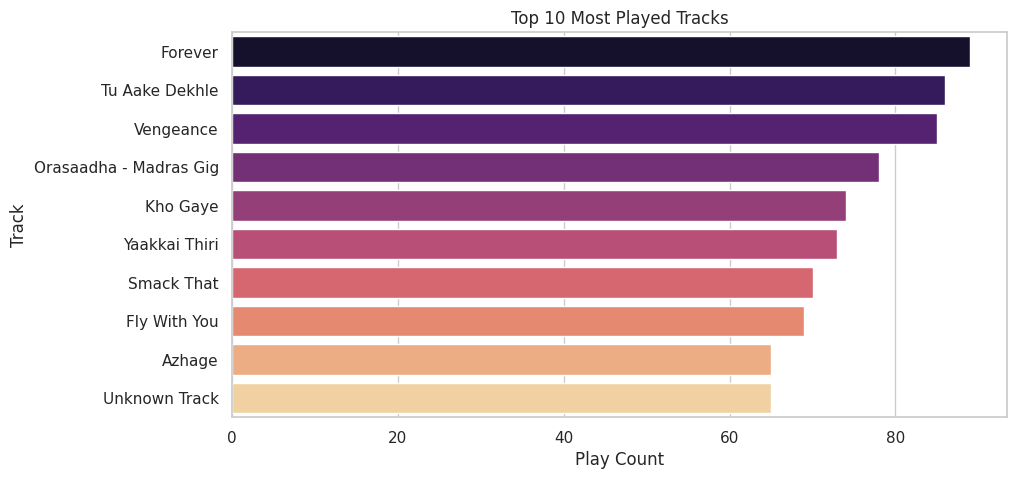

In [17]:
# 2. Top Tracks
top_tracks = df['master_metadata_track_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='magma')
plt.title('Top 10 Most Played Tracks')
plt.xlabel('Play Count')
plt.ylabel('Track')
plt.show()

# **The** **Skip** **Distribution**

<ipython-input-18-ffa5bad85fe5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='skipped', palette='coolwarm')


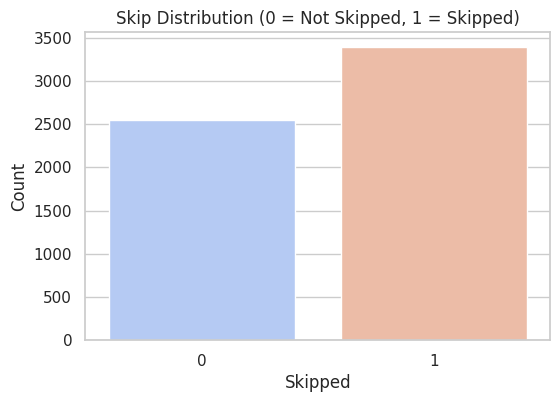

In [18]:
# 3. Skip Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='skipped', palette='coolwarm')
plt.title('Skip Distribution (0 = Not Skipped, 1 = Skipped)')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.show()

# **The** **Reason** **To** **start**

<ipython-input-19-8c53bc12d5e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='reason_start', order=df['reason_start'].value_counts().index, palette='cubehelix')


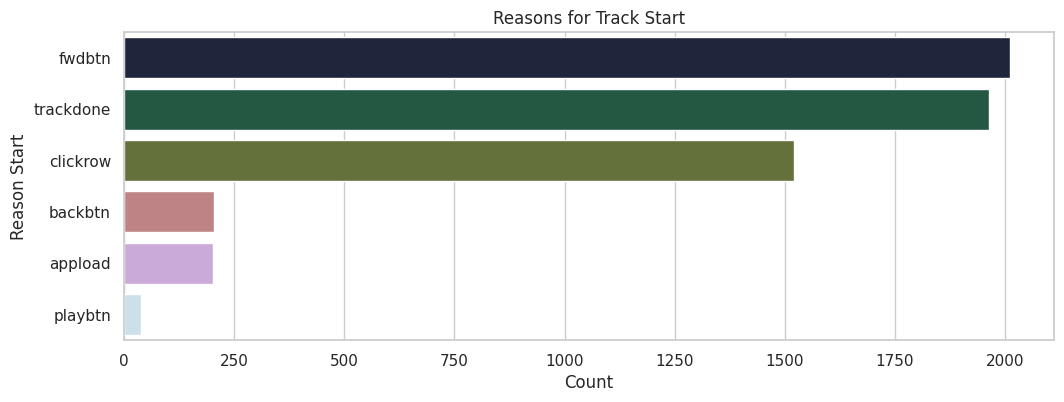

In [19]:
# 4. Reason Start
plt.figure(figsize=(12,4))
sns.countplot(data=df, y='reason_start', order=df['reason_start'].value_counts().index, palette='cubehelix')
plt.title('Reasons for Track Start')
plt.xlabel('Count')
plt.ylabel('Reason Start')
plt.show()

# **Platforms** **To** **Use**

<ipython-input-20-2986b5348baf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='Set2')


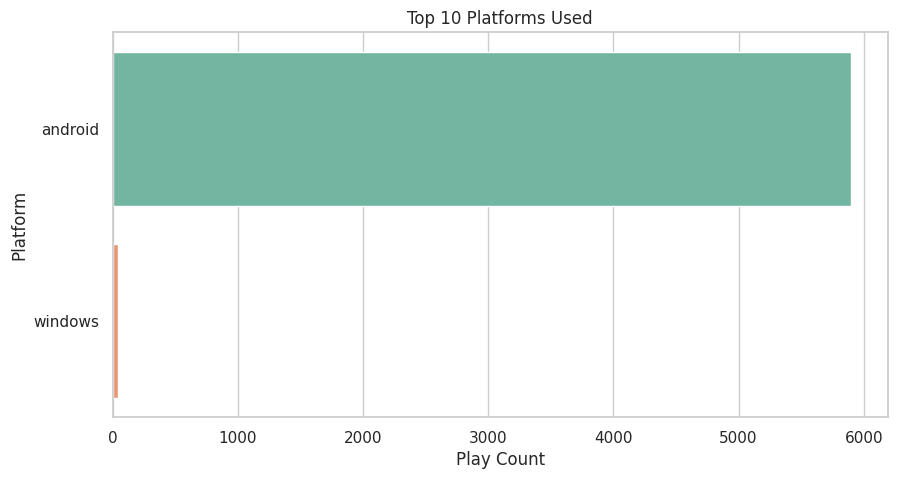

In [20]:
# 5. Platform Use
top_platforms = df['platform'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='Set2')
plt.title('Top 10 Platforms Used')
plt.xlabel('Play Count')
plt.ylabel('Platform')
plt.show()

# **Listening** **Over** **Time**

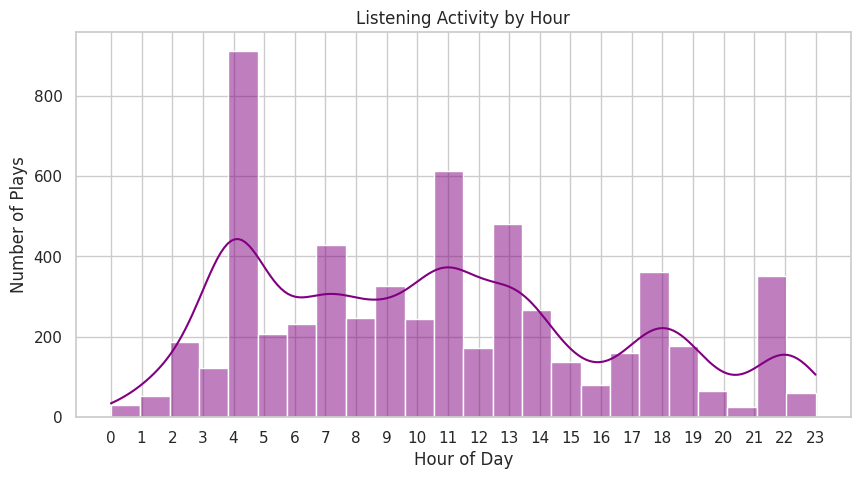

In [21]:
# 6. Listening Over Time
df['hour'] = df['ts'].dt.hour
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='hour', bins=24, kde=True, color='purple')
plt.title('Listening Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Plays')
plt.xticks(range(0, 24))
plt.show()

# **Shuffle**, **Offline** **and** **Incognito** **Use**

<ipython-input-22-cf258f0b08f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


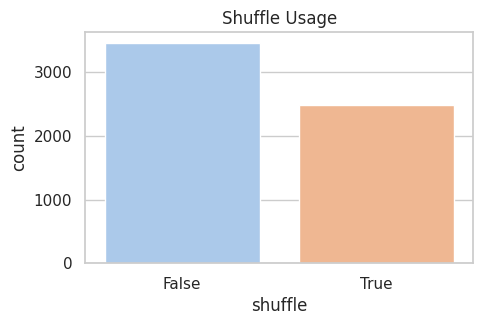

<ipython-input-22-cf258f0b08f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


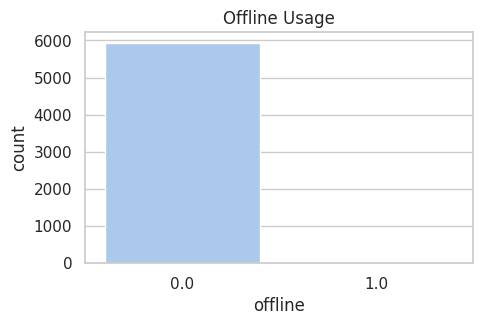

<ipython-input-22-cf258f0b08f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


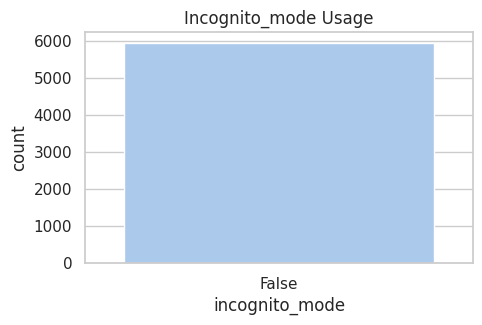

In [22]:
# 7. Shuffle, Offline, Incognito Use
for col in ['shuffle', 'offline', 'incognito_mode']:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'{col.capitalize()} Usage')
    plt.show()

# **Checking** **Correlation**

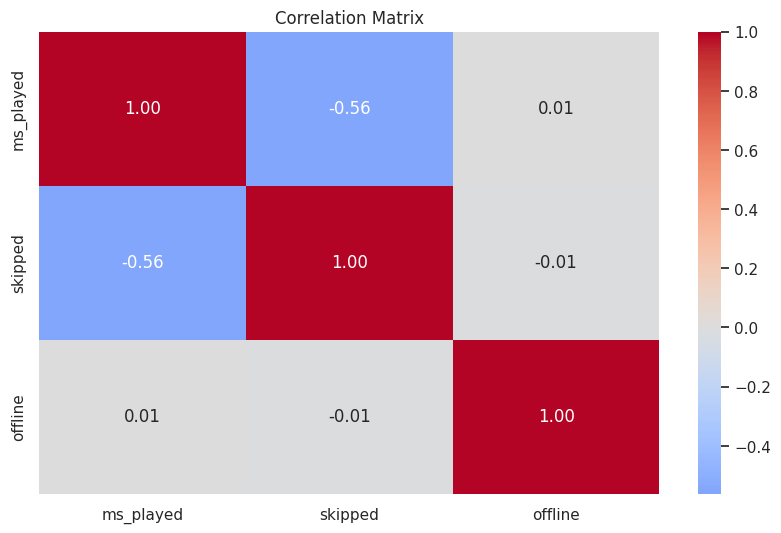

In [23]:
# Check correlation matrix for numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Optional: Convert boolean columns to int (if they exist)
for col in ['shuffle', 'offline', 'incognito_mode']:
    if col in numeric_df.columns:
        numeric_df[col] = numeric_df[col].astype(int)

# Include 'skipped' for correlation analysis
if 'skipped' in df.columns and 'skipped' not in numeric_df.columns:
    numeric_df['skipped'] = df['skipped']

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


# **Visualising** **Correlation**

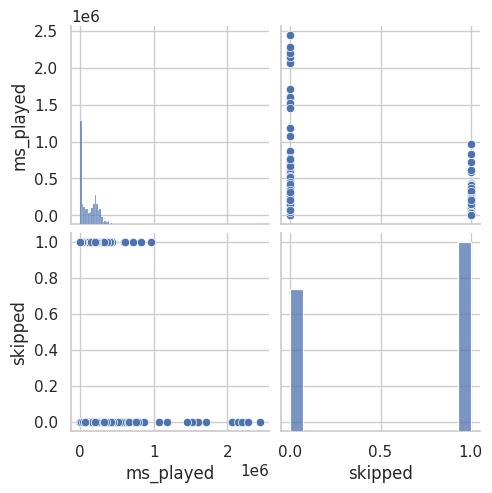

In [25]:
# Small pairplot to visualize numeric relationships
# Include only numerical features that are actually present in numeric_df
sns.pairplot(numeric_df[['ms_played', 'skipped']]) # Removed 'shuffle', 'offline' as they are not in numeric_df
plt.show()


# **Machine** **Learning** **models**

Decision Tree Accuracy: 0.8240740740740741

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       513
           1       0.85      0.84      0.84       675

    accuracy                           0.82      1188
   macro avg       0.82      0.82      0.82      1188
weighted avg       0.82      0.82      0.82      1188



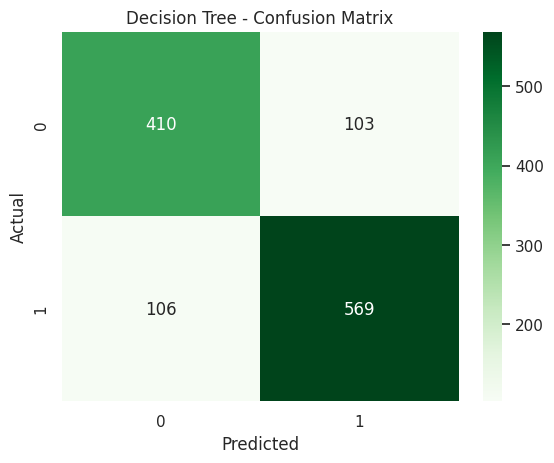

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate and train the model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# **Decision** **Tree** **Visualization**

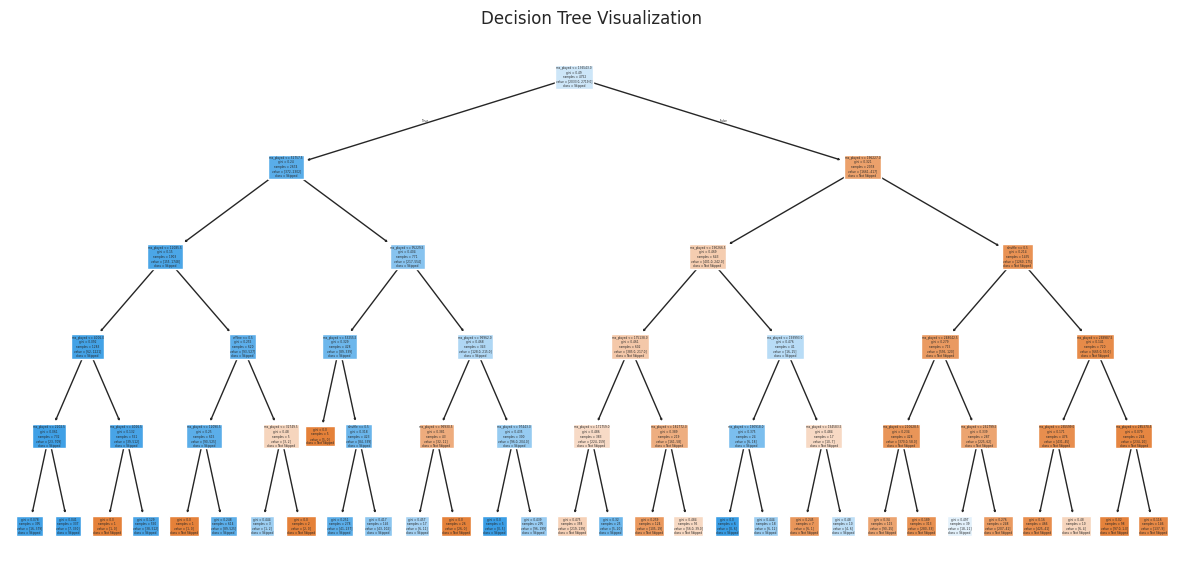

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7))
plot_tree(tree_model, feature_names=feature_cols, class_names=["Not Skipped", "Skipped"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


# **Feature** **Importance**

<ipython-input-33-8d89bd8d291e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='flare')


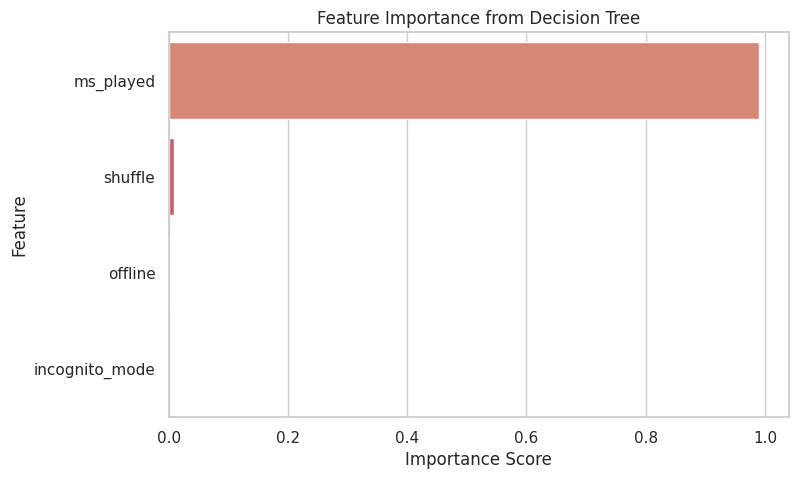

In [33]:
# Get feature importance from the Decision Tree
import pandas as pd

# Extract importance values
importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='flare')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# **Random** **Forest** **Classifier**

🎯 Random Forest Accuracy: 0.8274410774410774

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       513
           1       0.85      0.85      0.85       675

    accuracy                           0.83      1188
   macro avg       0.82      0.82      0.82      1188
weighted avg       0.83      0.83      0.83      1188



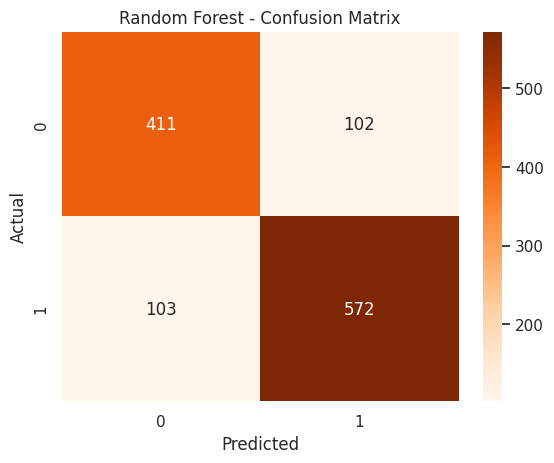

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


# **Saving** **The** **Model**

In [35]:
import joblib
joblib.dump(rf_model, 'spotify_skip_predictor.pkl')


['spotify_skip_predictor.pkl']